In [4]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [5]:
df = pd.read_csv('income.csv')
df

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,27,Male,HS-grad,9,Never-married,Private,Craft-repair,40,<=50K,0
1,47,Male,Masters,14,Married,Local-gov,Exec-managerial,50,>50K,1
2,59,Male,HS-grad,9,Divorced,Self-emp,Prof-specialty,20,<=50K,0
3,38,Female,Prof-school,15,Never-married,Federal-gov,Prof-specialty,57,>50K,1
4,64,Female,11th,7,Widowed,Private,Farming-fishing,40,<=50K,0
...,...,...,...,...,...,...,...,...,...,...
29995,45,Male,Masters,14,Married,State-gov,Prof-specialty,60,>50K,1
29996,33,Male,HS-grad,9,Married,Private,Machine-op-inspct,40,>50K,1
29997,47,Male,Prof-school,15,Married,Private,Prof-specialty,55,>50K,1
29998,32,Female,Some-college,10,Never-married,Private,Adm-clerical,40,<=50K,0


In [6]:
print(len(df))
df.head()

30000


,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,27,Male,HS-grad,9,Never-married,Private,Craft-repair,40,<=50K,0
1,47,Male,Masters,14,Married,Local-gov,Exec-managerial,50,>50K,1
2,59,Male,HS-grad,9,Divorced,Self-emp,Prof-specialty,20,<=50K,0
3,38,Female,Prof-school,15,Never-married,Federal-gov,Prof-specialty,57,>50K,1
4,64,Female,11th,7,Widowed,Private,Farming-fishing,40,<=50K,0


In [7]:
df['label'].value_counts()

label
0    21700
1     8300
Name: count, dtype: int64

In [8]:
df.columns

Index(['age', 'sex', 'education', 'education-num', 'marital-status',
       'workclass', 'occupation', 'hours-per-week', 'income', 'label'],
      dtype='object')

In [11]:
cat_cols = ['sex', 'education', 'marital-status', 'workclass', 'occupation']
cont_cols = ['age', 'hours-per-week']
y_col = ['label']

print(f'cat_cols  has {len(cat_cols)} columns')
print(f'cont_cols has {len(cont_cols)} columns')
print(f'y_col     has {len(y_col)} column')

cat_cols  has 5 columns
cont_cols has 2 columns
y_col     has 1 column


In [32]:
for col in cat_cols:
    df[col] = df[col].astype('category')

df[cat_cols].dtypes

sex               category
education         category
marital-status    category
workclass         category
occupation        category
dtype: object

In [33]:
from sklearn.utils import shuffle
df = shuffle(df, random_state=101)
df.reset_index(drop=True, inplace=True)
df.head()

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,30,Male,Bachelors,13,Married,Private,Adm-clerical,40,>50K,1
1,24,Female,Assoc-voc,11,Never-married,Self-emp,Other-service,38,<=50K,0
2,55,Male,HS-grad,9,Divorced,Self-emp,Exec-managerial,60,>50K,1
3,21,Male,11th,7,Never-married,Private,Craft-repair,45,<=50K,0
4,30,Male,Bachelors,13,Married,Local-gov,Prof-specialty,50,>50K,1


In [34]:
df = shuffle(df, random_state=101)
df.reset_index(drop=True,inplace=True)
df.head()

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,26,Male,11th,7,Divorced,Private,Handlers-cleaners,40,<=50K,0
1,40,Male,Masters,14,Married,Local-gov,Prof-specialty,40,<=50K,0
2,30,Male,Some-college,10,Never-married,Local-gov,Craft-repair,40,<=50K,0
3,24,Male,12th,8,Never-married,Private,Sales,40,<=50K,0
4,31,Female,HS-grad,9,Divorced,Private,Exec-managerial,40,<=50K,0


In [20]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size + 1) // 2)) for size in cat_szs]
emb_szs

[(2, 1), (14, 7), (6, 3), (5, 3), (12, 6)]

In [23]:
cats = np.stack([df[col].cat.codes.values for col in cat_cols], axis=1).astype(np.int64)
cats[:5]

array([[ 1, 13,  1,  2, 11],
       [ 1, 11,  1,  2,  7],
       [ 1, 10,  1,  2, 11],
       [ 1, 13,  1,  2,  5],
       [ 1, 10,  1,  2,  2]])

In [36]:
cats = torch.tensor(cats, dtype=torch.int64)
conts = np.stack([df[col].values for col in cont_cols], axis=1)
conts[:5]

C:\Users\admin\AppData\Local\Temp\ipykernel_14816\174450842.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cats = torch.tensor(cats, dtype=torch.int64)


array([[26, 40],
       [40, 40],
       [30, 40],
       [24, 40],
       [31, 40]])

In [37]:
conts = torch.tensor(conts, dtype=torch.float32)
conts.dtype

torch.float32

In [38]:
y = torch.tensor(df[y_col].values, dtype=torch.int64).flatten()

In [39]:
b = 30000  
t = 5000  
cat_train = cats[:b-t]
cat_test  = cats[b-t:b]
con_train = conts[:b-t]
con_test  = conts[b-t:b]
y_train = y[:b-t]
y_test  = y[b-t:b]

In [40]:
class TabularModel(nn.Module):
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_emb = sum((nf for ni, nf in emb_szs))
        n_in = n_emb + n_cont

        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i

        layerlist.append(nn.Linear(layers[-1], out_sz))
        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont):
        embeddings = [e(x_cat[:, i]) for i, e in enumerate(self.embeds)]
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)

        x = self.layers(x)
        return x


In [41]:
torch.manual_seed(33)

In [42]:
model = TabularModel(emb_szs, n_cont=len(cont_cols), out_sz=2, layers=[50], p=0.4)

In [43]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [44]:
epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)

    if i % 25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


epoch:   1  loss: 0.83793622
epoch:  26  loss: 0.67027354
epoch:  51  loss: 0.60199803
epoch:  76  loss: 0.56575936
epoch: 101  loss: 0.53992724
epoch: 126  loss: 0.51508623
epoch: 151  loss: 0.49739215
epoch: 176  loss: 0.48492905
epoch: 201  loss: 0.47638169
epoch: 226  loss: 0.46943915
epoch: 251  loss: 0.46400890
epoch: 276  loss: 0.45868438


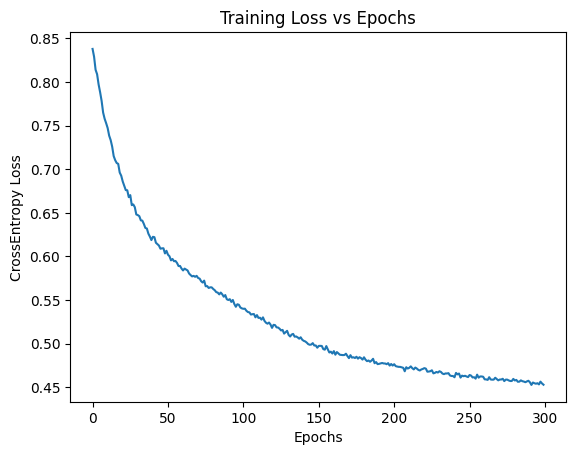

In [45]:
plt.plot(range(epochs), [l.item() for l in losses])
plt.xlabel("Epochs")
plt.ylabel("CrossEntropy Loss")
plt.title("Training Loss vs Epochs")
plt.show()

In [46]:
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.46886513


In [47]:
correct = 0
for i in range(len(y_test)):
    if y_val[i].argmax().item() == y_test[i].item():
        correct += 1
print(f'{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

3757 out of 5000 = 75.14% correct
